In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supply-chain-dataset/supply_chain_data.csv


In [28]:
import pandas as pd
df=pd.read_csv('/kaggle/input/supply-chain-dataset/supply_chain_data.csv')
print('This is a quick view of the dataset')
df.info()

This is a quick view of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    obje

In [29]:
print('Brief description of the dataset:')
df.describe()

Brief description of the dataset:


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [30]:
#!pip install seaborn : if library is not there

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

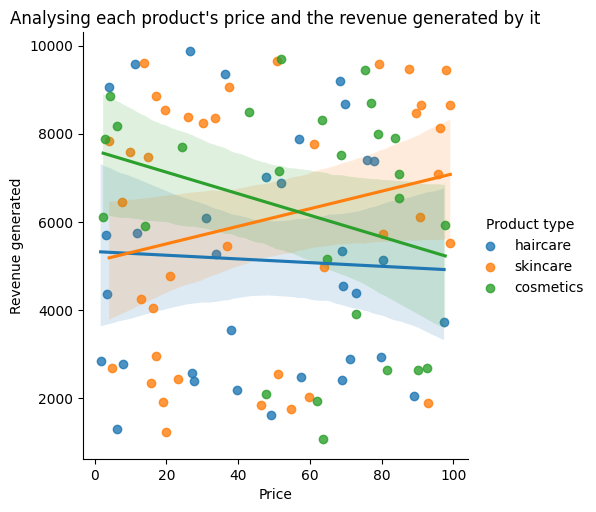

In [31]:
#Analysing product price with its revenue

sns.lmplot(data=df, x='Price',y='Revenue generated',hue='Product type')
plt.title("Analysing each product's price and the revenue generated by it")
plt.show()

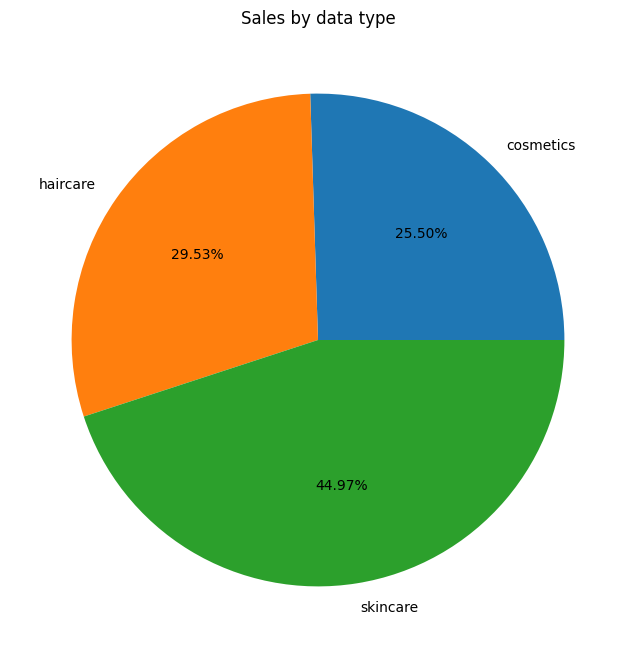

In [32]:
#Sales by product type 

sales_data=df.groupby('Product type')['Number of products sold'].sum().reset_index()

#pie chart
plt.figure(figsize=(8,8))
plt.pie(sales_data['Number of products sold'], labels=sales_data['Product type'],autopct='%1.2f%%')
plt.title('Sales by data type')
plt.show()

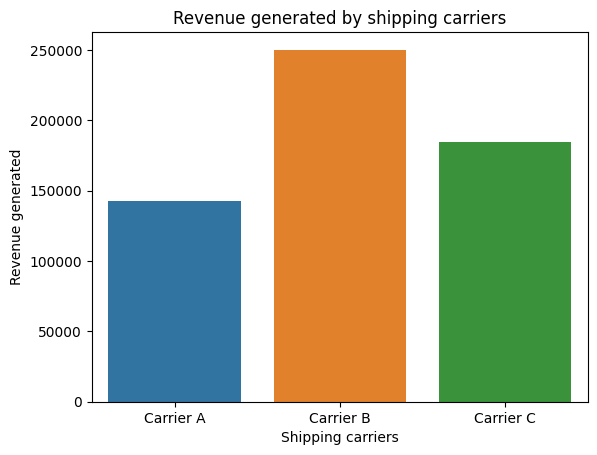

In [33]:
#Revenue generated by shipping carriers

total_revenue=df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

sns.barplot(data=total_revenue, x='Shipping carriers', y='Revenue generated')
plt.title('Revenue generated by shipping carriers')
plt.show()

In [34]:
# Avg Manufacturing cost and average lead time by product type

avg_manfg_cost=df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
avg_lead_time=df.groupby('Product type')['Lead time'].mean().reset_index()
result=pd.merge(avg_manfg_cost,avg_lead_time,on='Product type')
result.rename(columns={'Lead time' : 'Avg Lead time', 'Manufacturing Costs':'Avg Manfg Costs'},inplace=True)
print(result)

  Product type  Manufacturing costs  Avg Lead time
0    cosmetics            43.052740      13.538462
1     haircare            48.457993      18.705882
2     skincare            48.993157      18.000000


In [35]:
import plotly.express as px
revenue_chart=px.line(df,x='SKU',y='Revenue generated',title='Revenue generated by SKU')
revenue_chart.show()

In [36]:
import plotly.express as px
revenue_chart=px.line(df,x='SKU',y='Stock levels',title='Revenue generated by SKU')
revenue_chart.show()

In [37]:
order_quantity_chart=px.bar(df,x='SKU',y='Order quantities',title='Order quantities by SKU',hover_data=['Product type','Revenue generated'])
order_quantity_chart.show()
    

In [38]:
import plotly.express as px
shipping_costs_by_carrier=px.bar(df,x='Shipping costs',y='Shipping carriers',title='Shipping costs by carrier')
shipping_costs_by_carrier.show()

In [39]:
transportation_chart=px.pie(df,values='Costs',names='Transportation modes',title='Cost distribution by Transportation mode',hole=0.5)
transportation_chart.show()


In [40]:
defect_rates_by_product=df.groupby('Product type')['Defect rates'].mean().reset_index()
fig=px.bar(defect_rates_by_product,x='Product type',y='Defect rates',title='Average defect rates by product type')
fig.show()